In [1]:
!pip install --upgrade tensorflow

In [2]:
import os
import zipfile
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import numpy as np
import cv2
from tensorflow.keras import backend as K
from tensorflow.keras import models,layers,regularizers

import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split


try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

print("Tensorflow version " + tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Tensorflow version 2.16.1


In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [4]:
from google.colab import drive
import tensorflow as tf

# Load the saved model from Google Drive
model_path = '/content/drive/MyDrive/unet_model.h5' #'/content/drive/MyDrive/retinal_vessel_segmentation_model.h5'
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully.")

Model loaded successfully.


In [10]:
data_zip = "/content/drive/MyDrive/RetinalSegmentation.zip"
zip_ref = zipfile.ZipFile(data_zip, "r")
zip_ref.extractall("data.zip")
zip_ref.close()

In [12]:
import cv2
import numpy as np

def preprocess_image(image_path, img_size=(256, 256)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, img_size)
    image = image / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Example of preprocessing a single image
image_path = '/content/data.zip/retina/1002.png'  # image path
preprocessed_image = preprocess_image(image_path)
print("Image preprocessed successfully.")


Image preprocessed successfully.


In [13]:
preprocessed_image.shape

(1, 256, 256, 3)

In [14]:
preprocessed_image[0].shape

(256, 256, 3)

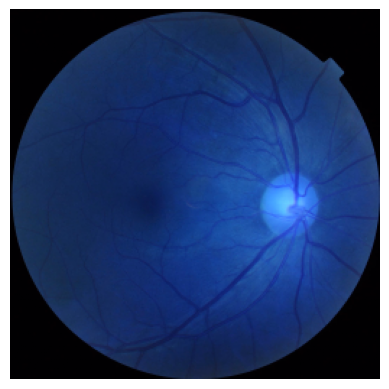

In [16]:
# Extract the image from the batch
image = preprocessed_image[0]

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

In [10]:
#print(list(preprocessed_image[0]>0.5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


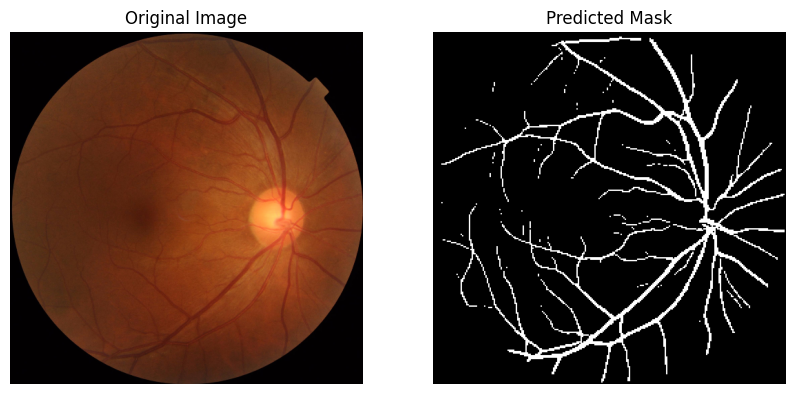

In [17]:
  # Make prediction
prediction = model.predict(preprocessed_image)

# Convert prediction to binary mask
predicted_mask = np.where(prediction > 0.5, 1, 0)

# Remove batch dimension for visualization
predicted_mask = np.squeeze(predicted_mask, axis=0)

# Visualize the result
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display predicted mask
plt.subplot(1, 2, 2)
plt.imshow(predicted_mask, cmap='gray')
plt.title('Predicted Mask')
plt.axis('off')

plt.show()


In [11]:
#preprocessed_image